## FINAL EXAM ANALYSIS 

# **(1) Loading the Dataset**

In [1]:
# !pip install konlpy
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# **(+1) Before preprocessing; EDA**

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train.head() #category, content, title 
test.head()

,category,content,title
0,육아/교육,세 자녀 이상을 둔 다자녀 가정의 경우 대학생 국가장학금 제도 개편이 정말 시급합니...,다자녀 가정 대학 국가장학금 제도 개선해 주세요
1,정치개혁,국민을위해 국민을위한다면 정말 대한민국을 위한다면 자리에 연연하지마시고 그만 내려오세요,"조국, 이재명, 임종석, 탁현민, 유은혜 이제 자리에서 그만 내려오세요"
2,정치개혁,공무원은 죄가잇으면 처벌안합니가 업무상 죄가있으면 두배세배 처벌해야 되야되는거아닙니...,촛불은 힘있고 권력있는자 아니면 공무원을 위한촛불입니까
3,인권/성평등,현재 사회에서 가장 이슈가 되는것이 남녀간의 갈등이 가장 큰 이슈인걸 알고 있을실거...,남녀간의 갈등 대한민국 남성은 노예?
4,정치개혁,문재인 대통령이 전정부 채동욱 전검찰총장 해임에 강력히 반발하던 특정지역 윤석열을 ...,공정수사을 위하여 윤석열 파면 하세요


In [3]:
#check for nan values 
train.isnull().sum()
test.isnull().sum() 
# #there are no null values in the dataset 
len(train) #10686
len(test) #1158

1158

In [4]:
#check for duplicates 
train[train['title'].duplicated()] #562 rows 
#there are duplicates in the titles  -> but content are somewhat different 
train[train['content'].duplicated()] #384 rows 
#duplicates in the content too -> different titles 

train[train[['content', 'title']].duplicated()].head(20) #247 rows that have same title and content -> delete these ! 

train.drop_duplicates(subset=['content', 'title'], inplace=True) #drop duplicates in the dataset 
len(train) #10439
train.head(10)
# train[train[['content', 'title']].duplicated()] #no more duplicates 

,category,content,title
0,정치개혁,"문통, 직접 민의를 살피지 않고 권력의 권좌에 앉아 보고만 받고 권력의 힘만 누렸으...","문통, 직접 민의를 살피지 않고 보고에만 의존하였으니 이젠 가망이 없소!"
1,육아/교육,초등학교 내 학부형 모임인 ‘아버지회’ 의 문제점을 제기하고자 합니다. 초등학교 내...,"뇌물수수, 청탁이 만연하는 초등학교 아버지회를 없애주세요"
2,보건복지,주변을 둘러보면 생활이 어렵지만 기초생활수급자 자격요건에 해당되지 않아 지원을 받지...,기초생활수급자 자격요건을 확대해주세요
3,경제민주화,"거래소 노조 ""시감위원장 금융위 낙하산 인사 중단하라"" 한국거래소 노조는 현재 진행...",문재인 대통령님 시장감시위원장 인선과 관련해 금융위원회 낙하산 인사를 즉각 중단하십시요.
4,육아/교육,"안녕하세요 서울시 송파구 풍납2동 OOOO어린이집 보낸 김OO(여), 정OO(남)아...",저희아이들이 어린이집서 학대를 당했습니다. 어린이집 아동학대 피해아동 구제해 주세요.
5,보건복지,치매병원에 어머니를 입원 시킨 가족입니다. 병원비가 적지 않게 들어요 정부 초창기 ...,치매가족 지원
6,인권/성평등,가해자에게만 유리한 법 성범죄 공소시효를 폐지시켜 주세요. 가해자와 피해자를 동등한...,성범죄 공소시효를 폐지시켜 주십시요.
7,인권/성평등,FC서울의 응원단들은 타 팀들의 응원단에 많은 패를 끼친다. 그들은 먼저 다른 응원...,"FC서울 타나토스, 수호신 등 해체"
8,보건복지,미세먼지 마스크 개봉시 심한 역한 냄새가 나는것이 점점 늘어나고 있으며 형광물질은 ...,미세먼지 마스크 유해성/안전성 믿고 써도 되나요?
9,육아/교육,청소년에대한 방송을보고 교육하는교장이나 경찰등이 대처하는 방법에 대해서 화가 너무납...,그것이 알고싶다를보고 너무 화가나서 청원함


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_

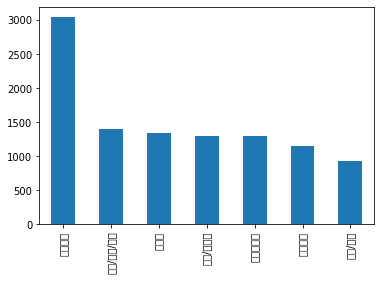

In [5]:
#check labels 
train['category'].value_counts().plot(kind = 'bar')  #한글이라 깨지지만 폰트 설정하면 된당

# **(2) Preprocessing the dataset**

In [6]:
#use both content and title for text processing  --> add up both columns 

train['text'] = train['title']+' '+ train['content'] 
train.head()


test['text'] = test['title']+' '+ test['content'] 
test.head()

,category,content,title,text
0,육아/교육,세 자녀 이상을 둔 다자녀 가정의 경우 대학생 국가장학금 제도 개편이 정말 시급합니...,다자녀 가정 대학 국가장학금 제도 개선해 주세요,다자녀 가정 대학 국가장학금 제도 개선해 주세요 세 자녀 이상을 둔 다자녀 가정의 ...
1,정치개혁,국민을위해 국민을위한다면 정말 대한민국을 위한다면 자리에 연연하지마시고 그만 내려오세요,"조국, 이재명, 임종석, 탁현민, 유은혜 이제 자리에서 그만 내려오세요","조국, 이재명, 임종석, 탁현민, 유은혜 이제 자리에서 그만 내려오세요 국민을위해 ..."
2,정치개혁,공무원은 죄가잇으면 처벌안합니가 업무상 죄가있으면 두배세배 처벌해야 되야되는거아닙니...,촛불은 힘있고 권력있는자 아니면 공무원을 위한촛불입니까,촛불은 힘있고 권력있는자 아니면 공무원을 위한촛불입니까 공무원은 죄가잇으면 처벌안합...
3,인권/성평등,현재 사회에서 가장 이슈가 되는것이 남녀간의 갈등이 가장 큰 이슈인걸 알고 있을실거...,남녀간의 갈등 대한민국 남성은 노예?,남녀간의 갈등 대한민국 남성은 노예? 현재 사회에서 가장 이슈가 되는것이 남녀간의 ...
4,정치개혁,문재인 대통령이 전정부 채동욱 전검찰총장 해임에 강력히 반발하던 특정지역 윤석열을 ...,공정수사을 위하여 윤석열 파면 하세요,공정수사을 위하여 윤석열 파면 하세요 문재인 대통령이 전정부 채동욱 전검찰총장 해임...


In [7]:
import re   
import numpy as np


def preprocess_data(train, test,content): 

  #cleaning the train_x  
  train[content] = train[content].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","") #글자외의 문자 삭제 
  train.replace('', np.nan, inplace=True) #특수문자로 이루어졌던 후기의 경우 -> nan으로 표기 
  train=train.dropna(how = 'any') #nan 데이터 삭제하기 

  #cleaning the test_x  
  test[content] = test[content].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #글자 외의 문자 삭제 
  test.replace('', np.nan, inplace=True) #특수문자로 이루어졌던 후기의 경우 -> nan으로 표기 
  test=test.dropna(how = 'any') #nan 데이터 삭제하기 


  #make sure no nan is in the dataset for vectorization 
  return train,test

train,test = preprocess_data(train, test,'title')

train.head(10)
test.head(10)

,category,content,title,text
0,육아/교육,세 자녀 이상을 둔 다자녀 가정의 경우 대학생 국가장학금 제도 개편이 정말 시급합니...,다자녀 가정 대학 국가장학금 제도 개선해 주세요,다자녀 가정 대학 국가장학금 제도 개선해 주세요 세 자녀 이상을 둔 다자녀 가정의 ...
1,정치개혁,국민을위해 국민을위한다면 정말 대한민국을 위한다면 자리에 연연하지마시고 그만 내려오세요,조국 이재명 임종석 탁현민 유은혜 이제 자리에서 그만 내려오세요,"조국, 이재명, 임종석, 탁현민, 유은혜 이제 자리에서 그만 내려오세요 국민을위해 ..."
2,정치개혁,공무원은 죄가잇으면 처벌안합니가 업무상 죄가있으면 두배세배 처벌해야 되야되는거아닙니...,촛불은 힘있고 권력있는자 아니면 공무원을 위한촛불입니까,촛불은 힘있고 권력있는자 아니면 공무원을 위한촛불입니까 공무원은 죄가잇으면 처벌안합...
3,인권/성평등,현재 사회에서 가장 이슈가 되는것이 남녀간의 갈등이 가장 큰 이슈인걸 알고 있을실거...,남녀간의 갈등 대한민국 남성은 노예,남녀간의 갈등 대한민국 남성은 노예? 현재 사회에서 가장 이슈가 되는것이 남녀간의 ...
4,정치개혁,문재인 대통령이 전정부 채동욱 전검찰총장 해임에 강력히 반발하던 특정지역 윤석열을 ...,공정수사을 위하여 윤석열 파면 하세요,공정수사을 위하여 윤석열 파면 하세요 문재인 대통령이 전정부 채동욱 전검찰총장 해임...
5,육아/교육,유치원3법 다좋습니다 병설유치원은 많지 않고 어쩔수없어 사립으로가는경우도 많습니다 ...,유치원법,유치원3법 유치원3법 다좋습니다 병설유치원은 많지 않고 어쩔수없어 사립으로가는경우도...
6,보건복지,100세 시대 노인이 많은 나라! 집에서 어른들을 간호할 여력이 되지 않고 요양병원...,노인 요양병원 대소변 일괄처리 어떻게 생각하세요,노인 요양병원 대소변 일괄처리 어떻게 생각하세요? 100세 시대 노인이 많은 나라!...
7,경제민주화,살려 주세요! 경남제약 상폐 되면 저희 가족 위기에서 벗어 날수가 없습니다! 착곡 ...,경남제약 상폐 철회 해 주세요,경남제약 상폐 철회 해 주세요 살려 주세요! 경남제약 상폐 되면 저희 가족 ...
8,보건복지,아무리 외쳐보고 국민연금 공단에 전화를 해도 똑 같은 답 77조 노후 공적자금 참 ...,국민연금 힘든 국민들 묶어 놓고 외면하는가,국민연금 힘든 국민들 묶어 놓고 외면하는가 아무리 외쳐보고 국민연금 공단에 전화...
9,교통/건축/국토,아파트 층간소음으로 폭행에 살인으로 이어지는 기사가 이어지고 있습니다. 아파트 거실...,아파트 층간소음 건설사에서 고쳐주든지 배상하게 해주세요,아파트 층간소음 건설사에서 고쳐주든지 배상하게 해주세요 아파트 층간소음으로 폭행에 ...


In [8]:
#split the dataset into train, val, test 

from sklearn.model_selection import train_test_split


def split_data(train,test,condition):

  #split the dataset into train/validation set 
  train, validation = train_test_split(train, test_size =.2 , random_state = 123)
  train_x , train_y = train[condition], train['category']
  test_x, test_y  = test[condition] , test['category']
  val_x, val_y = validation[condition], validation['category']

  return train_x , train_y, test_x, test_y , val_x, val_y

train_x , train_y, test_x, test_y , val_x, val_y= split_data(train,test,'title') #title 만 이용한다 시간이 너무 오래걸리기때문에 
#if we have time we can use text to preprocess and split ; text : lots of words so takes a long time to preprocess the dataset
train_x.head()

9898     경제민주화
984      경제민주화
3022      보건복지
8648      정치개혁
10137      일자리
Name: category, dtype: object

In [9]:
#one hot encode the categories 

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
train_y=np.array(train_y).reshape(-1,1)
test_y=np.array(test_y).reshape(-1,1)
val_y=np.array(val_y).reshape(-1,1)



onehot.fit(train_y)
train_y_onehot = onehot.transform(train_y).toarray()
test_y_onehot = onehot.transform(test_y).toarray()
val_y_onehot = onehot.transform(val_y).toarray()

val_y_onehot[:10]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

# **(3) TOKENIZING the dataset**

-make a list of lists (tokens of words)

In [10]:

from konlpy.tag import Hannanum, Kkma, Komoran, Okt 

#different vectorizations 
okt=Okt()  
hannanum= Hannanum()
kkma =Kkma()
komoran =Komoran()

#self made stopwords 
stopwords = ['의','가','이','은','들','는','을','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','주세요','하세요','하자','드립니다','합니다','하라','입니다','있다' ]


def tokenize_dataset(train_x,test_x,val_x):

  X_train = [] 
  for sentence in train_x:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) #words in a list 
    # temp_X = hannanum.morphs(sentence,stem=True)
    # temp_X = kkma.morphs(sentence,stem=True)
    # temp_X = komoran.morphs(sentence,stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] #delete's stopwords 
    X_train.append(temp_X) #append to new list 
    # print(temp_X)

  print('Train_done')


  X_val = [] 
  for sentence in val_x:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) #words in a list 
    # temp_X = hannanum.morphs(sentence,stem=True)
    # temp_X = kkma.morphs(sentence,stem=True)
    # temp_X = komoran.morphs(sentence,stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] #delete's stopwords 
    X_val.append(temp_X) #append to new list 


  print('Validation_done')
  

  X_test = [] 
  for sentence in test_x:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) #words in a list 
    # temp_X = hannanum.morphs(sentence,stem=True)
    # temp_X = kkma.morphs(sentence,stem=True)
    # temp_X = komoran.morphs(sentence,stem=True)
    temp_X = [word for word in temp_X if not word in stopwords] #delete's stopwords 
    X_test.append(temp_X) #append to new list 

  print('Test_done')
  return X_train, X_test, X_val

X_train, X_test, X_val= tokenize_dataset(train_x,test_x,val_x)

X_train[:10]

Train_done
Validation_done
Test_done


[['거래소', '부당하다', '경남', '제약', '죽이다'],
 ['무주', '대', '신혼부부', '자살', '사건'],
 ['다른',
  '말',
  '필요없다',
  '국민',
  '에게',
  '일체',
  '도움',
  '안되다',
  '오히려',
  '화',
  '만',
  '돋다',
  '국회',
  '필요없다'],
 ['어린이집', '에서', '장애', '아', '동', '차별', '못', '해주다'],
 ['내',
  '년도',
  '우리',
  '경제',
  '체질개선',
  '과활',
  '력',
  '높이다',
  '위해',
  '서',
  '라도',
  '경남',
  '제약',
  '살리다'],
 ['피해',
  '가족',
  '에게',
  '억',
  '요',
  '구',
  '어린이집',
  '문제',
  '어린이집',
  '간판',
  '바꾸다',
  '운영',
  '하',
  '지',
  '못',
  '해주다'],
 ['문재인', '탄핵', '하고', '이낙연', '대통령', '뽑다'],
 ['문재인', '정부', '경', '제', '정의', '사망', '신고'],
 ['여성폭력', '방지', '기본', '법', '반대'],
 ['부유세', '만들다']]

# **(4) VECTORIZING dataset**

-use BOX: tf-idf, tf ,onehotencoding ->차원이 매우 크다는 단점 

:make the tokens into a int-tokened data (정수 인코딩) 

-use word2vec (self trained matrix)

-use embedding layer(Embedding()) 

-use pretrained embedding matrix



In [11]:
# #what should we use for the length of the size (using text: max is 8691 but this is too big)

# total_list = list(X_train) + list(X_val) + list(X_test)
#   # print(total_list[:10])

# cnt= []
# for i in range(0, len(total_list)):
#   cnt.append(len(total_list[i]))

# a = np.array(cnt)
# cnt.sort()
# sum(cnt) / len(cnt) #the mean is 165 

# np.percentile(a, 75) #3rd quantile 
# max(cnt)

163

In [12]:
#0 EMBEDDING LAYERS BY KERAS 


#check the total words in the train_set 
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#padded data -- needed when using embedding methods 

def padd_dataset(X_train, X_val , X_test): 


  #tokenize data 
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X_train+X_val) #use the train_dataset for making a dictionary

  total_count = len(tokenizer.word_index) 
  # print(total_count)


  #make a vocab_size ::
  vocab_size = total_count +1 #for padding 0  : data has vocab_size words 

  #list of lists of int-encoding
  X_train = tokenizer.texts_to_sequences(X_train) #정수 리스트 
  X_val = tokenizer.texts_to_sequences(X_val)
  X_test = tokenizer.texts_to_sequences(X_test)

  print('tokenizing is finished')

  #padd dataset for same length 

  temp_list = []

  total_list = list(X_train) + list(X_val) + list(X_test)
  # print(total_list[:10])

  cnt= []
  for i in range(0, len(total_list)):
    cnt.append(len(total_list[i]))

  avg_len = sum(cnt) / len(cnt) #평균 : 165.28 
  max_len = max(cnt) #가장 긴 문장 (가장 단어가 많은 문장)
  #text를 이용하면 8691

  # max_len = 200 #길이를 제한한다 
    
  print('starts to padd the dataset')
  #padd the vectors with post padding 

  X_train = pad_sequences(X_train, maxlen = max_len, padding = 'post')
  X_val = pad_sequences(X_val, maxlen = max_len, padding = 'post')
  X_test = pad_sequences(X_test, maxlen = max_len, padding = 'post')


  return X_train, X_val, X_test,tokenizer,vocab_size,max_len


X_train_padd, X_val_padd, X_test_padd, tokenizer, vocab_size, max_len = padd_dataset(X_train, X_val , X_test)
#vocab_size: total words in dataset with index starting at 1 
#max_len: longest sentence which has max length of number of  words 

#tokenizer.word_index : 단어에 매칭된 인덱스를 알수있음 


vocab_size #총단어수 :  10759
max_len #163

X_train_padd.shape 
X_val_padd.shape  

X_test_padd.shape #(1158, 8691)


X_train_padd #array padded with zeros in back 

Using TensorFlow backend.


tokenizing is finished
starts to padd the dataset


array([[ 391,  400,    6, ...,    0,    0,    0],
       [5636,   14,  581, ...,    0,    0,    0],
       [ 522,  130, 1110, ...,    0,    0,    0],
       ...,
       [  61, 3946,    0, ...,    0,    0,    0],
       [ 301,  187, 2004, ...,    0,    0,    0],
       [ 488,  361,  917, ...,    0,    0,    0]], dtype=int32)

# **(4+) WORD2VEC on dataset, load pretrained word2vec too**


In [13]:
#1 WORD2VEC  --uses tokenized datasets 

from gensim.models import Word2Vec

#X_train+X_val : list of tokenized word sentences 
model = Word2Vec(sentences=X_train+X_val, size=max_len, window=5, min_count=10, workers=4, sg=0)  #cbow 이용 
#size: vector dimension , (word_num, 8691)  

model.wv.vectors.shape 
#size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원 , 
#window = 컨텍스트 윈도우 크기 ,  -> 앞뒤로 몇개의 단어를 사용할 것인지 
#min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
#workers = 학습을 위한 프로세스 수,
#sg = 0은 CBOW, 1은 Skip-gram.

#see the results of word2vec 
word2vec_matrix = model.wv
vocab= word2vec_matrix.vocab.keys() #dictionary 

#word_vector: this is the vector that is resulted in the word2vec -> use this matrix in modeling 
model.wv.vectors.shape 


word2vec_embedding = np.zeros((vocab_size, max_len))

for i,word in enumerate(vocab): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    i= i+1
    # print(word,str(i))
    # print(word2vec_matrix[word])
    word2vec_embedding[i] = word2vec_matrix[word] # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입
    # print(word2vec_embedding)
    
word2vec_embedding #my word2vec saved into a array 
word2vec_embedding.shape #(10759, 163)

(10759, 163)

In [27]:

#2 PRETRAINED EMBEDDING LAYERS 

#using embedding pre-trained- match on my dataset 

#사용법 :  Embedding에 사전 훈련된 embedding_matrix를 입력으로 넣어주고 모델을 학습시킨다
#불러온 훈련된 매트릭스의 차원만큼 0으로 채운다. 
#만약 훈련된 매트릭스가 (100000,300)이면 100000개의 단어가 300차원으로 포현되어있으니, 
#embedding_matrix = np.zeros((vocab_size, 300)) 나의 단어수,300차원으로 0을 채워준다 

import gensim
f = gensim.models.Word2Vec.load('ko.bin')


f.wv.vectors.shape 


pretrain = f.wv    

#check for my words 
def get_vector(word):
    if word in pretrain:
        return pretrain[word]
    else:
        return None #pretrained matrix 에 없으면 0으로 남는다 


#make an embedding matrix to save the words in my data 
embedding_matrix = np.zeros((vocab_size, 163)) #use all of the vectors 

for word,i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 값(value)를 임시 변수에 저장
    # print(i)
    # print(word)
    # print(temp)
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp 

    # print(embedding_matrix)


embedding_matrix.shape #(10759, 200)
embedding_matrix # matrix with our words : lots of 0 are inside


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


ValueError: ignored

# **(4) Building a Model**





In [17]:


from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#embedding 에서 
#1) word2vec을 쓰거나, 
#2) embedding 을 위해 만든 padd data 를 쓴다
#3) pretrained embedded layer을 쓴다 

#(1)word2vec

# model.add(Embedding(vocab_size, output_dim= 45, weights=[word2vec_embedding], input_length=max_len , trainable=False))  

#vocab_size = word2vec_matrix.shape[0]
#output_dim : word2vec만들때 설정한 size (100) :word2vec_matrix.shape[1]


#(2)embedding layer 
# model.add(Embedding(int(vocab_size),output_dim= max_len, input_length= int((max_len))))


#(3)pretrained embedded layer 
#trainable;이미 훈련된 임베딩 메트릭스라 훈련안함
# model.add(Embedding(vocab_size, output_dim= 200, weights=[embedding_matrix], input_length=max_len, trainable=False)) #output_dim : columm  

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) #4번동안 작아지면 멈춤 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) 

**0.Without Embedding Matrix(using embedding layer in sklearn)**

In [18]:
#1 RNN  


def RNN_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot):
  #model building 
  model = Sequential()
  model.add(Embedding(int(vocab_size),output_dim= max_len, input_length= int((max_len))))
  model.add(SimpleRNN(32)) # RNN 셀의 unit= 32
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(7, activation='softmax')) #7 categories 
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy : multi class category 
  model.summary()

  return model 


#fit to train 
rnn= RNN_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot)

rnn.fit(X_train_padd, train_y_onehot, epochs=20, batch_size=64,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 163, 163)          1753717   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 10)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
Total params: 1,760,396
Trainable params: 1,760,396
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
131/131 [==============================] - 9s 67ms/step - loss: 1.8765 - accuracy: 0.2905 - val_loss: 1.8742 - val_accuracy: 0.2872
Epoch 2/20
131/131 [==============================] - 8s 65ms/step - loss: 1.8678 - accuracy: 0.289

In [19]:

#2 LSTM - NOT USING EMBEDDED LAYER 


#make embedding layer using keras 

#임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.
#어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



def LSTM_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot):
  model = Sequential()
  model.add(Embedding(int(vocab_size),output_dim= max_len, input_length= int((max_len))))
  #vocab_size ; +1 because embedding index starts at 1 (not 0) :did it in before cell 
  #vocab_size= how many letters when using tokenizer 
  #input_length=max_len : the total vector length (after padding)


  model.add(LSTM(128, return_sequences=True ))    
  

  model.add(Flatten())
  model.add(Dense(20, activation= 'relu'))


  model.add(Dense(7, activation='softmax')) #7 categories 
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy : multi class category 
  model.summary()

  return model 

#fit to train 

lstm =LSTM_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot)
lstm.fit(X_train_padd, train_y_onehot, epochs=20, batch_size=64,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 163, 163)          1753717   
_________________________________________________________________
lstm (LSTM)                  (None, 163, 128)          149504    
_________________________________________________________________
flatten (Flatten)            (None, 20864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                417300    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 147       
Total params: 2,320,668
Trainable params: 2,320,668
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
131/131 [==============================] - 59s 454ms/step - loss: 1.7181 - accuracy: 0.3609 - val_l

In [20]:
#3 CNN --without embedding matrix used   

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


def cnn_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot):

  model = Sequential()
  model.add(Embedding(vocab_size, 256)) #embedding dimenstion =256 -> conv1d dimenstion = 256으로 맞춰준다 
  model.add(Dropout(0.3))
  model.add(Conv1D(256, 3, padding='valid', activation='relu')) #filter_size= 3 
  model.add(GlobalMaxPooling1D())
  model.add(Dropout(0.5)) 
  model.add(Flatten()) #flatten을 진행해야, activation 진행가능 (CNN특징) -> (summary확인하기 ) 2차원에서 1차원으로! 
  model.add(Dense(128, activation='relu')) 

  model.add(Dense(7, activation='softmax')) #7 categories 
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy : multi class category 
  model.summary()

  return model 

cnn =cnn_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot)
cnn.fit(X_train_padd, train_y_onehot, epochs=20, batch_size=64,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 256)         2754304   
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 256)         196864    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

**1.Using embedding matrix(pretrained, selftrained)**

In [22]:

#1 LSTM -  USING EMBEDDED LAYER  : word2vec / embedding_matrix

def LSTM_model_embedded(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot, matrix): #matrix: word2vec_embedding / embedding_matrix
  model = Sequential()

  model.add(Embedding(vocab_size, output_dim=max_len , weights=[matrix], input_length=max_len , trainable=True)) #fine tunning 

  model.add(LSTM(128, return_sequences=True ))    

  model.add(Flatten())

  model.add(Dense(7, activation='softmax')) #7 categories 
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy : multi class category 
  model.summary()

  return model 



#fit to train  -- selftrained
lstm_selftrain=LSTM_model_embedded(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot, word2vec_embedding)
lstm_selftrain.fit(X_train_padd, train_y_onehot, epochs=20, batch_size=128,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])
#increase batchsize since there is no time 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 163, 163)          1753717   
_________________________________________________________________
lstm_2 (LSTM)                (None, 163, 128)          149504    
_________________________________________________________________
flatten_3 (Flatten)          (None, 20864)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 146055    
Total params: 2,049,276
Trainable params: 2,049,276
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
66/66 [==============================] - 47s 709ms/step - loss: 1.7499 - accuracy: 0.3317 - val_loss: 1.7748 - val_accuracy: 0.2824
Epoch 2/20
66/66 [==============================] - 45s 682ms/step - loss: 1.3753 - accuracy: 0.502

In [28]:
#using pretrained word2vec

lstm_pretrained=LSTM_model_embedded(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot, embedding_matrix)
lstm_pretrained.fit(X_train_padd, train_y_onehot, epochs=10, batch_size=256,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 163, 163)          1753717   
_________________________________________________________________
lstm_3 (LSTM)                (None, 163, 128)          149504    
_________________________________________________________________
flatten_4 (Flatten)          (None, 20864)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 146055    
Total params: 2,049,276
Trainable params: 2,049,276
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
33/33 [==============================] - 36s 1s/step - loss: 1.7855 - accuracy: 0.3203 - val_loss: 1.5182 - val_accuracy: 0.4132
Epoch 2/10
33/33 [==============================] - 36s 1s/step - loss: 1.2611 - accuracy: 0.5705 - v

In [30]:
#2 CNN --using embedding matrix 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


def cnn_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot, matrix):

  model = Sequential()
  model.add(Embedding(vocab_size, output_dim=max_len , weights=[matrix], input_length=max_len , trainable=True)) 
  
  #embedding dimenstion, conv1d dimenstion = max_len 으로 맞춰준다 
  model.add(Dropout(0.3))
  model.add(Conv1D(max_len, 3, padding='valid', activation='relu')) #filter_size= 3 
  model.add(GlobalMaxPooling1D())
  model.add(Dropout(0.5)) 


  model.add(Flatten()) #flatten을 진행해야, activation 진행가능 (CNN특징) -> (summary확인하기 ) 2차원에서 1차원으로! 
  model.add(Dense(32, activation='relu')) 

  model.add(Dense(7, activation='softmax')) #7 categories 
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #categorical_crossentropy : multi class category 
  model.summary()

  return model 

cnn_pretrained= cnn_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot, embedding_matrix)
cnn_pretrained.fit(X_train_padd, train_y_onehot, epochs=10, batch_size=512,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 163, 163)          1753717   
_________________________________________________________________
dropout_4 (Dropout)          (None, 163, 163)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 161, 163)          79870     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 163)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 163)               0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 163)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)              

KeyboardInterrupt: ignored

In [31]:
cnn_selftrained= cnn_model(X_train_padd,train_y_onehot,X_val_padd,val_y_onehot, embedding_matrix)
cnn_selftrained.fit(X_train_padd, train_y_onehot, epochs=10, batch_size=512,validation_data=(X_val_padd, val_y_onehot), callbacks=[es, mc])


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 163, 163)          1753717   
_________________________________________________________________
dropout_6 (Dropout)          (None, 163, 163)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 161, 163)          79870     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 163)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 163)               0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 163)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)              

KeyboardInterrupt: ignored

# **(5) Evaluation of the Model**


In [32]:
from sklearn.metrics import f1_score

def evaluate(X_test_padd,test_y_onehot,model):
  predictions = model.predict_classes(X_test_padd, verbose= 1) 
  test_y_onehot =  np.argmax(test_y_onehot, axis=1).reshape(-1,)
  print(f1_score(test_y_onehot, predictions, average= 'macro'))



In [33]:

#evaluation of each models 



#not using embedding matrix

print('rnn evaluation')
evaluate(X_test_padd,test_y_onehot,rnn)
print('lstm evaluation')
evaluate(X_test_padd,test_y_onehot,lstm)
print('cnn evaluation')
evaluate(X_test_padd,test_y_onehot,cnn)



#embedding matrix 

print('selftrained lstm evaluation')
evaluate(X_test_padd,test_y_onehot,lstm_selftrained)

print('pretrained lstm evaluation')
evaluate(X_test_padd,test_y_onehot,lstm_pretrained)

print('selftrained cnn evaluation')
evaluate(X_test_padd,test_y_onehot,cnn_selftrained)

print('pretrained cnn evaluation')
evaluate(X_test_padd,test_y_onehot,cnn_pretrained)

rnn evaluation
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
37/37 [==============================] - 0s 11ms/step
0.26263148074811893
lstm evaluation
37/37 [==============================] - 2s 54ms/step
0.6412934515346876
cnn evaluation
37/37 [==============================] - 1s 36ms/step
0.6918010990022113
selftrained lstm evaluation


NameError: ignored